In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv("C:\\Users\\sneha\\Downloads\\ToyotaCorolla1.csv")

In [67]:
df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [68]:
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [69]:
df= df.loc[:,['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]

In [70]:
df.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [71]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [72]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [73]:
df.duplicated().sum()

1

In [74]:
df.drop_duplicates(inplace = True)

In [75]:
df.duplicated().sum()

0

In [76]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']= 250

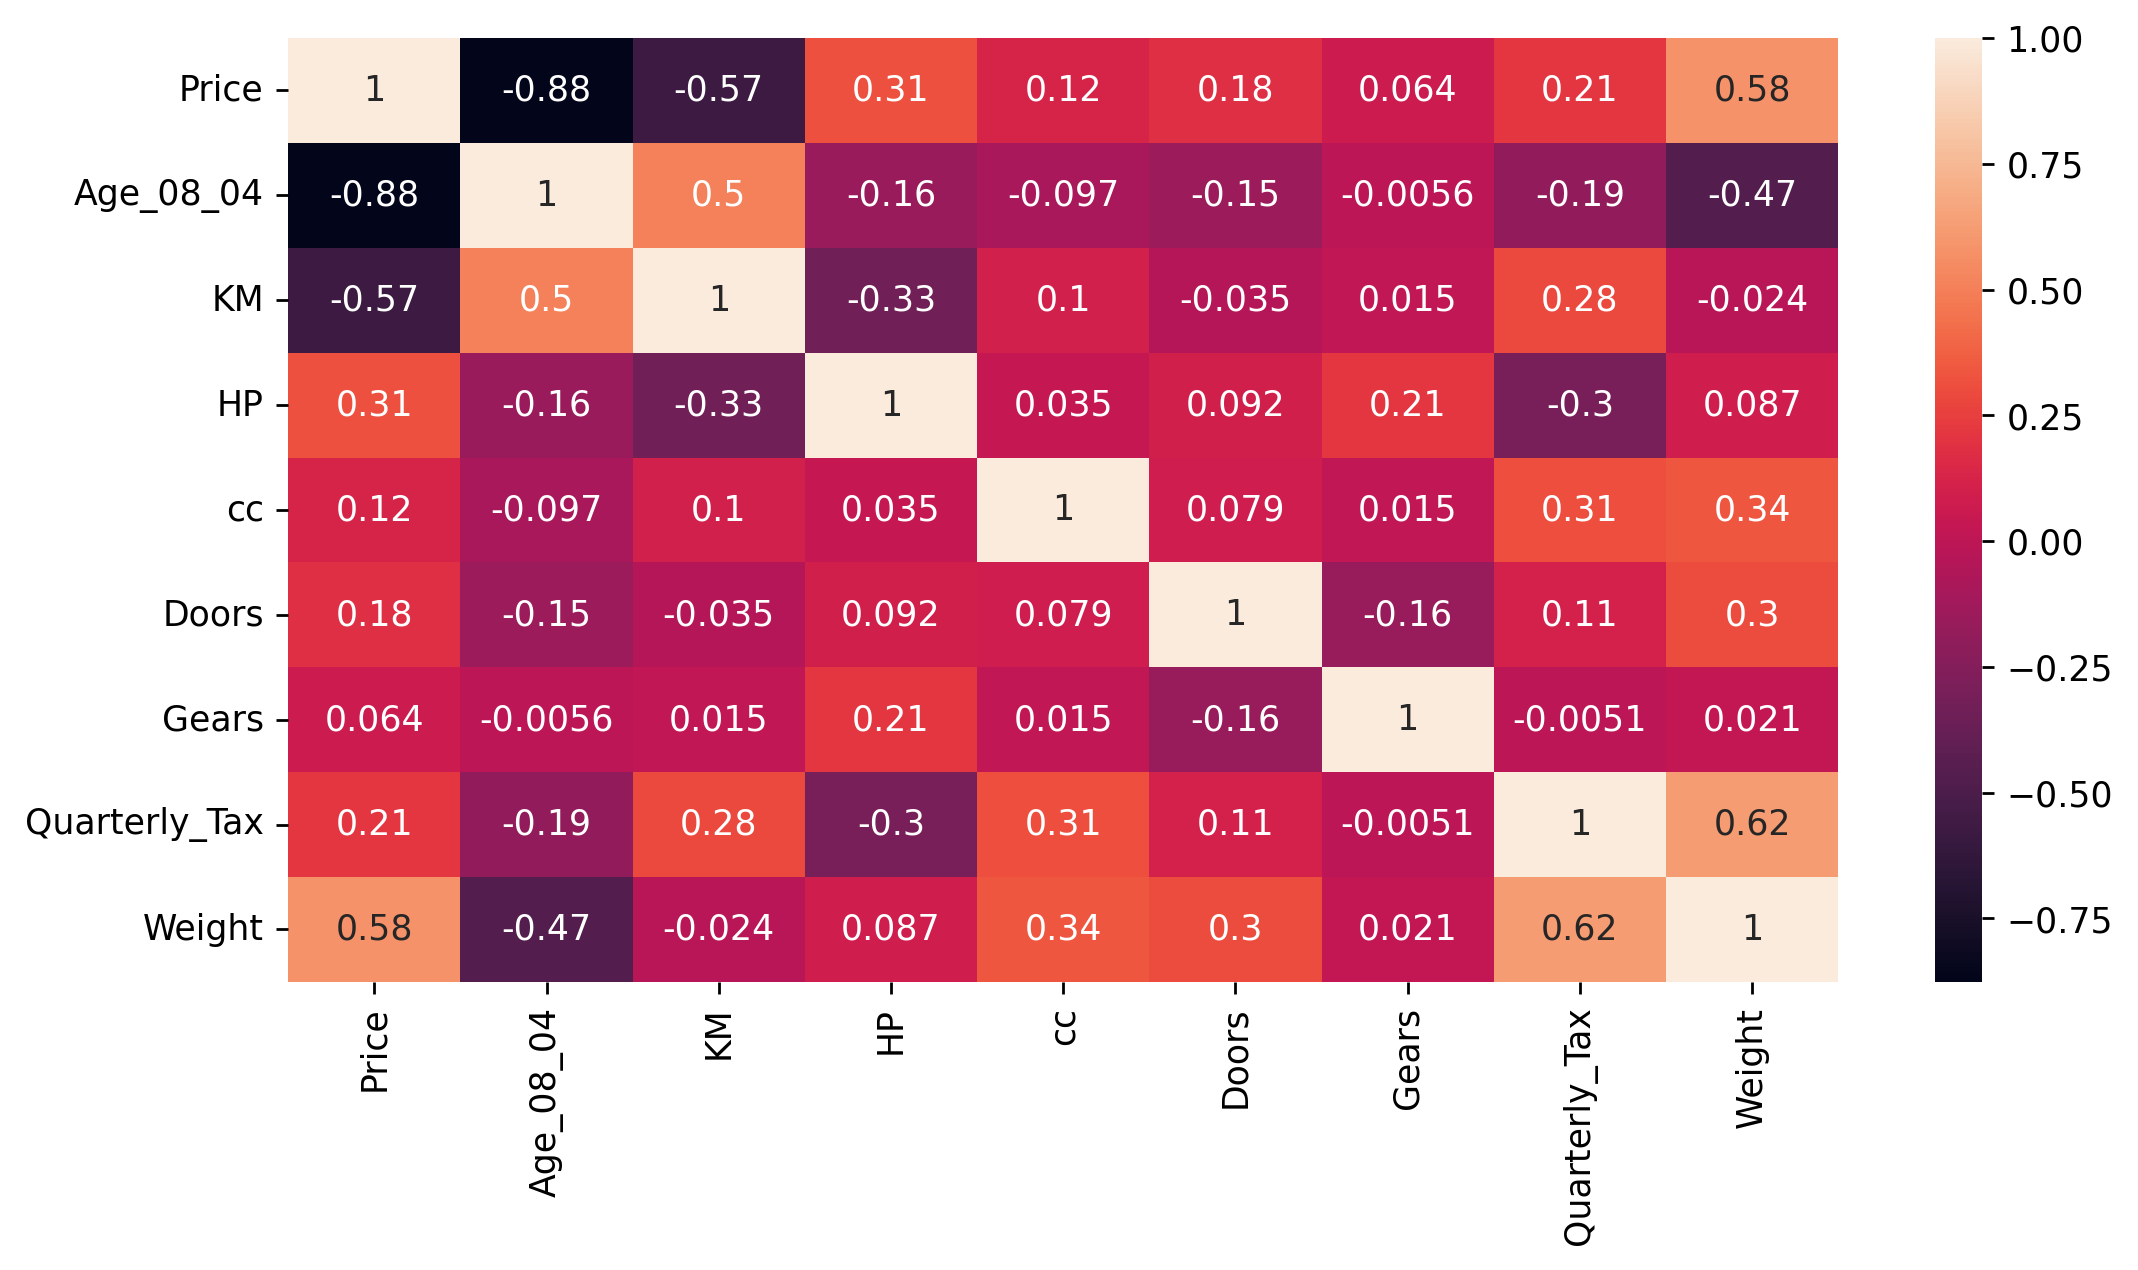

In [77]:
sns.heatmap(df.corr(), annot = True);

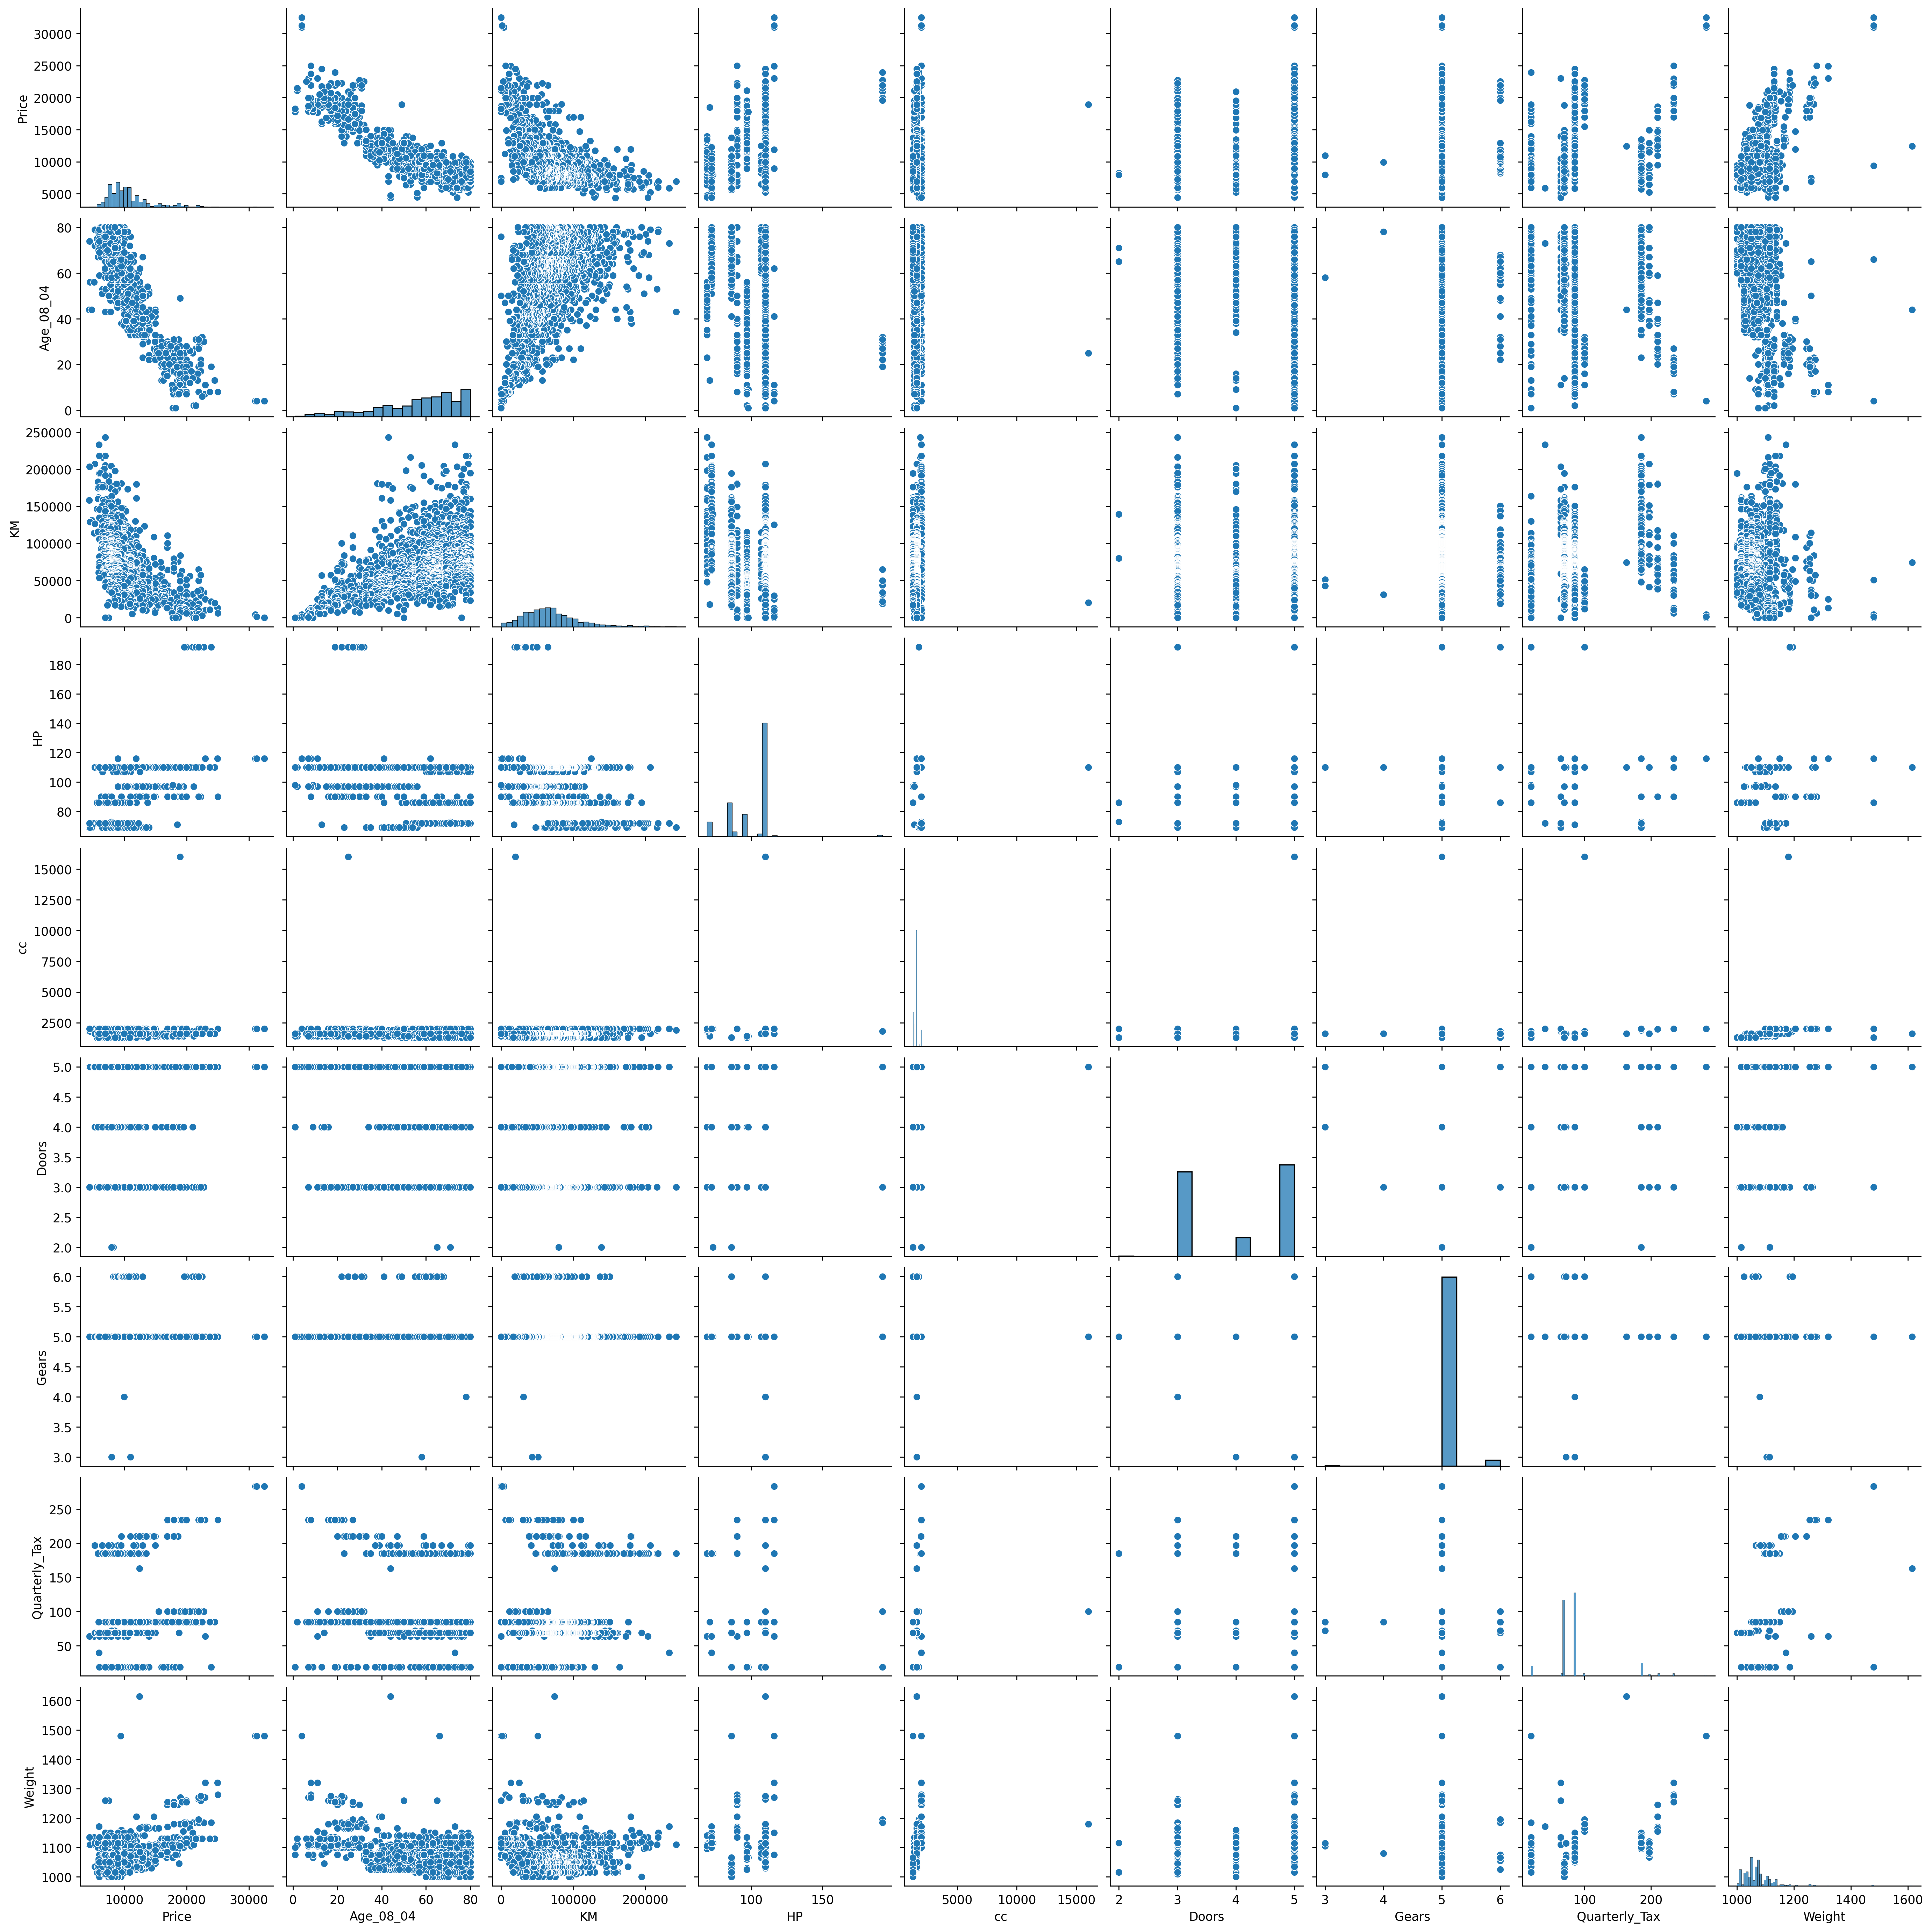

In [78]:
sns.pairplot(df);

In [79]:
df.rename(columns={'Age_08_04':'age', 'Quarterly_Tax':'tax'}, inplace = True)

In [80]:
import statsmodels.formula.api as smf

In [81]:
model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight', data = df).fit()

In [82]:
model.params

Intercept   -5472.540368
age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
tax             3.858805
Weight         16.855470
dtype: float64

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:37:44   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
m1 = smf.ols('Price~cc', data= df).fit()
m1.pvalues

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

In [85]:
m2 = smf.ols('Price~Doors', data= df).fit()
m2.pvalues

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

In [86]:
m3 = smf.ols('Price~cc+Doors', data= df).fit()
m3.pvalues

Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
vif = pd.DataFrame()

In [89]:
vif['viffact']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['feature'] = df.columns
vif.round(2)

,viffact,feature
0,70.77,Price
1,46.66,age
2,9.01,KM
3,71.36,HP
4,17.20,cc
5,21.86,Doors
6,439.79,Gears
7,11.19,tax
8,668.04,Weight


In [94]:
#model without weight col

In [90]:
model11 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax', data = df).fit()

In [91]:
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1059.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:41:31   Log-Likelihood:                -12481.
No. Observations:                1435   AIC:                         2.498e+04
Df Residuals:                    1427   BIC:                         2.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9990.3469   1100.231      9.080      0.000    7832.103    1.21e+04
age         -136.3300      2.648    -51.483      0.000    -141.524    -131.136
KM            -0.0200      0.001    -14.715      0.000      -0.023      -0.017
HP            43.2997      2.944     14.708      0.000      37.525      49.075
cc             0.1085      0.096      1.127      0.260      -0.080       0.297
Doors        157.5018     41.925      3.757      0.000      75.260     239.744
Gears        625.4171    213.353      2.931      0.003     206.898    1043.936
tax           15.9298      1.152     13.827      0.000      13.670      18.190
==============================================================================
Omnibus:                      218.215   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.088
Skew:                           0.705   Prob(JB):                    2.75e-177
Kurtosis:                       6.408   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

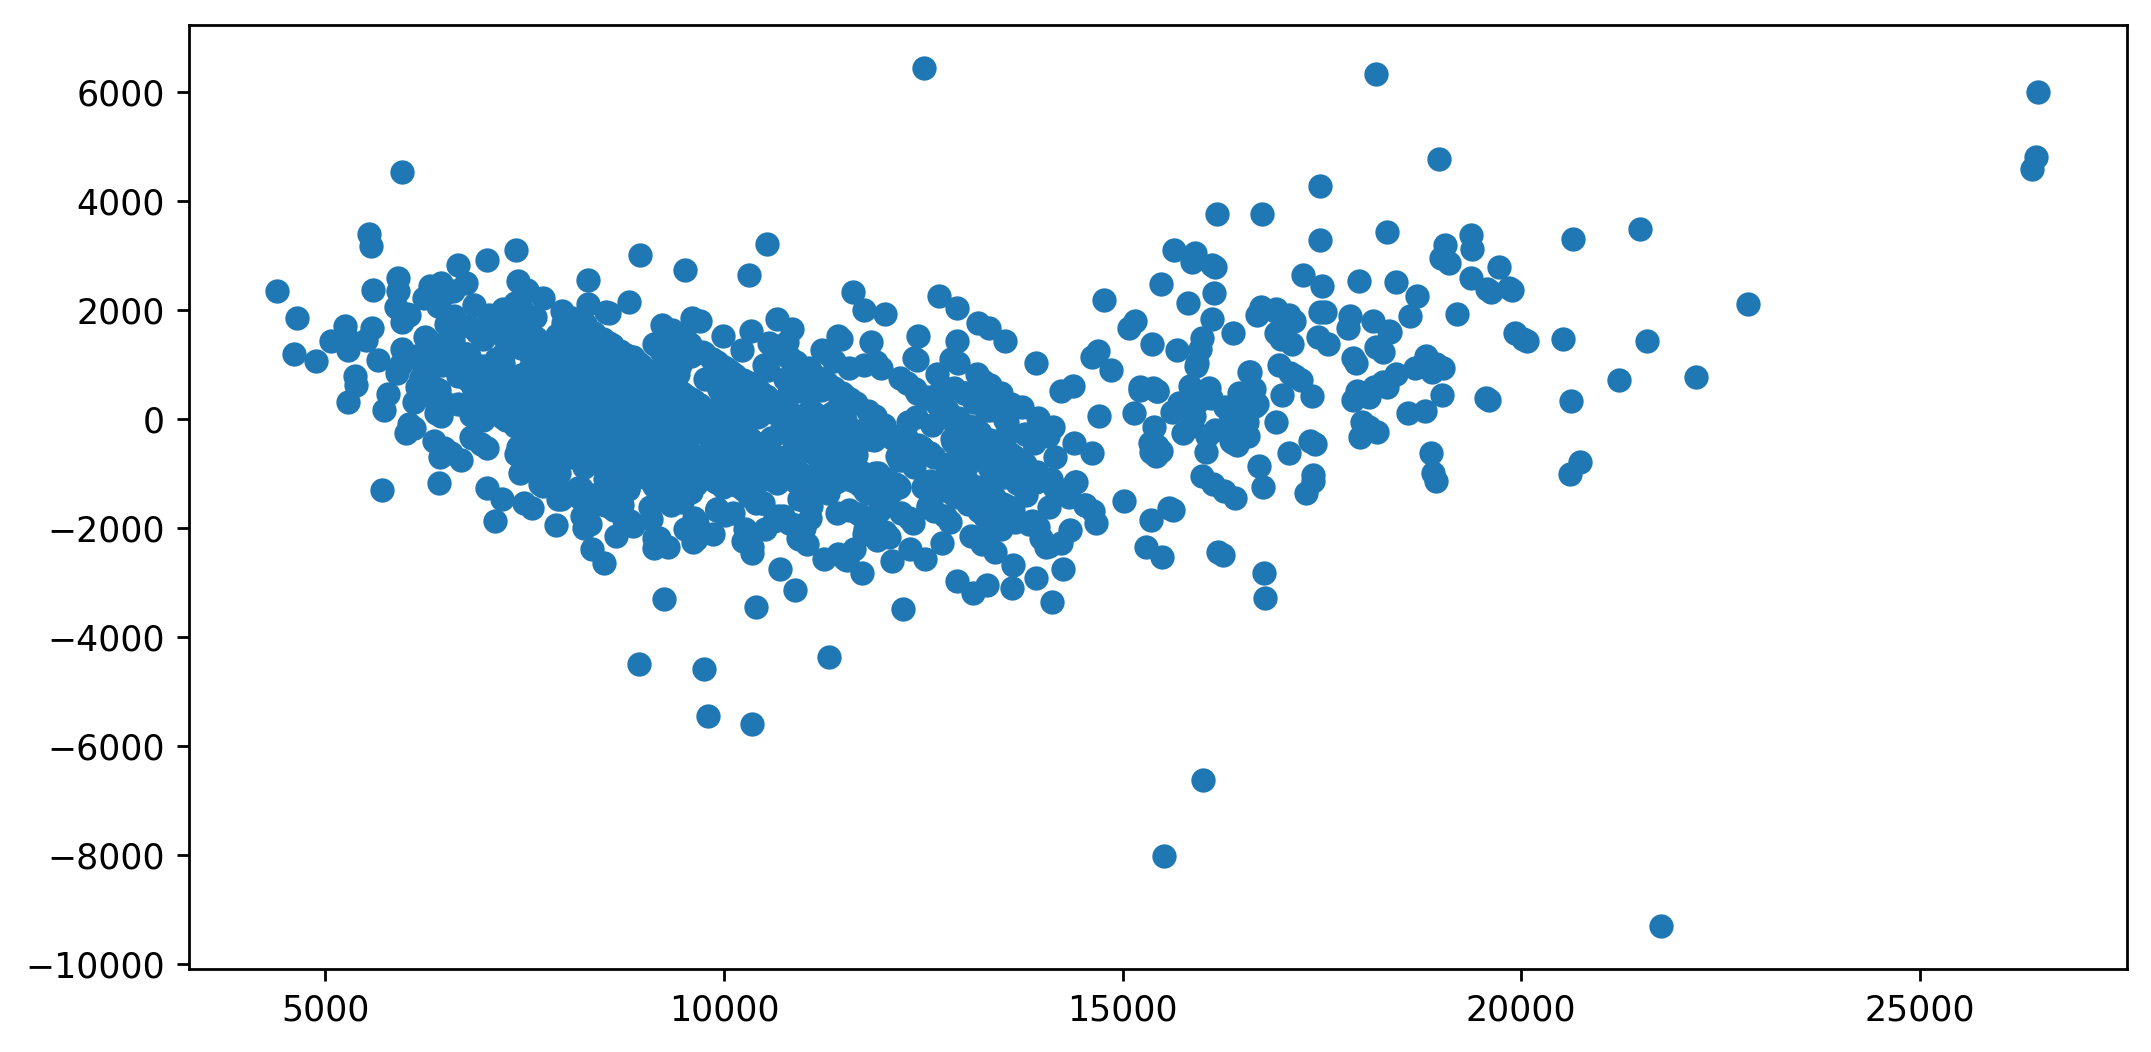

In [47]:
plt.scatter(model.fittedvalues, model.resid);

In [48]:
df1 = df.drop(df.index[[190, 191, 220, 392, 401, 600, 653, 959]], axis = 0).reset_index(drop=True)

In [49]:
df1.shape

(1427, 9)

In [51]:
final = smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight', data = df1).fit()

In [52]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1376.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:57:38   Log-Likelihood:                -12162.
No. Observations:                1427   AIC:                         2.434e+04
Df Residuals:                    1418   BIC:                         2.439e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.572e+04   1440.567    -10.913      0.000   -1.85e+04   -1.29e+04
age         -113.9179      2.463    -46.257      0.000    -118.749    -109.087
KM            -0.0204      0.001    -17.741      0.000      -0.023      -0.018
HP            19.1854      2.667      7.194      0.000      13.954      24.417
cc            -0.2027      0.082     -2.457      0.014      -0.364      -0.041
Doors        -97.7271     37.154     -2.630      0.009    -170.610     -24.844
Gears        617.6420    179.188      3.447      0.001     266.139     969.145
tax           -5.8436      1.328     -4.401      0.000      -8.448      -3.239
Weight        28.3859      1.217     23.330      0.000      25.999      30.773
==============================================================================
Omnibus:                       41.098   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.714
Skew:                           0.223   Prob(JB):                     2.68e-16
Kurtosis:                       4.003   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

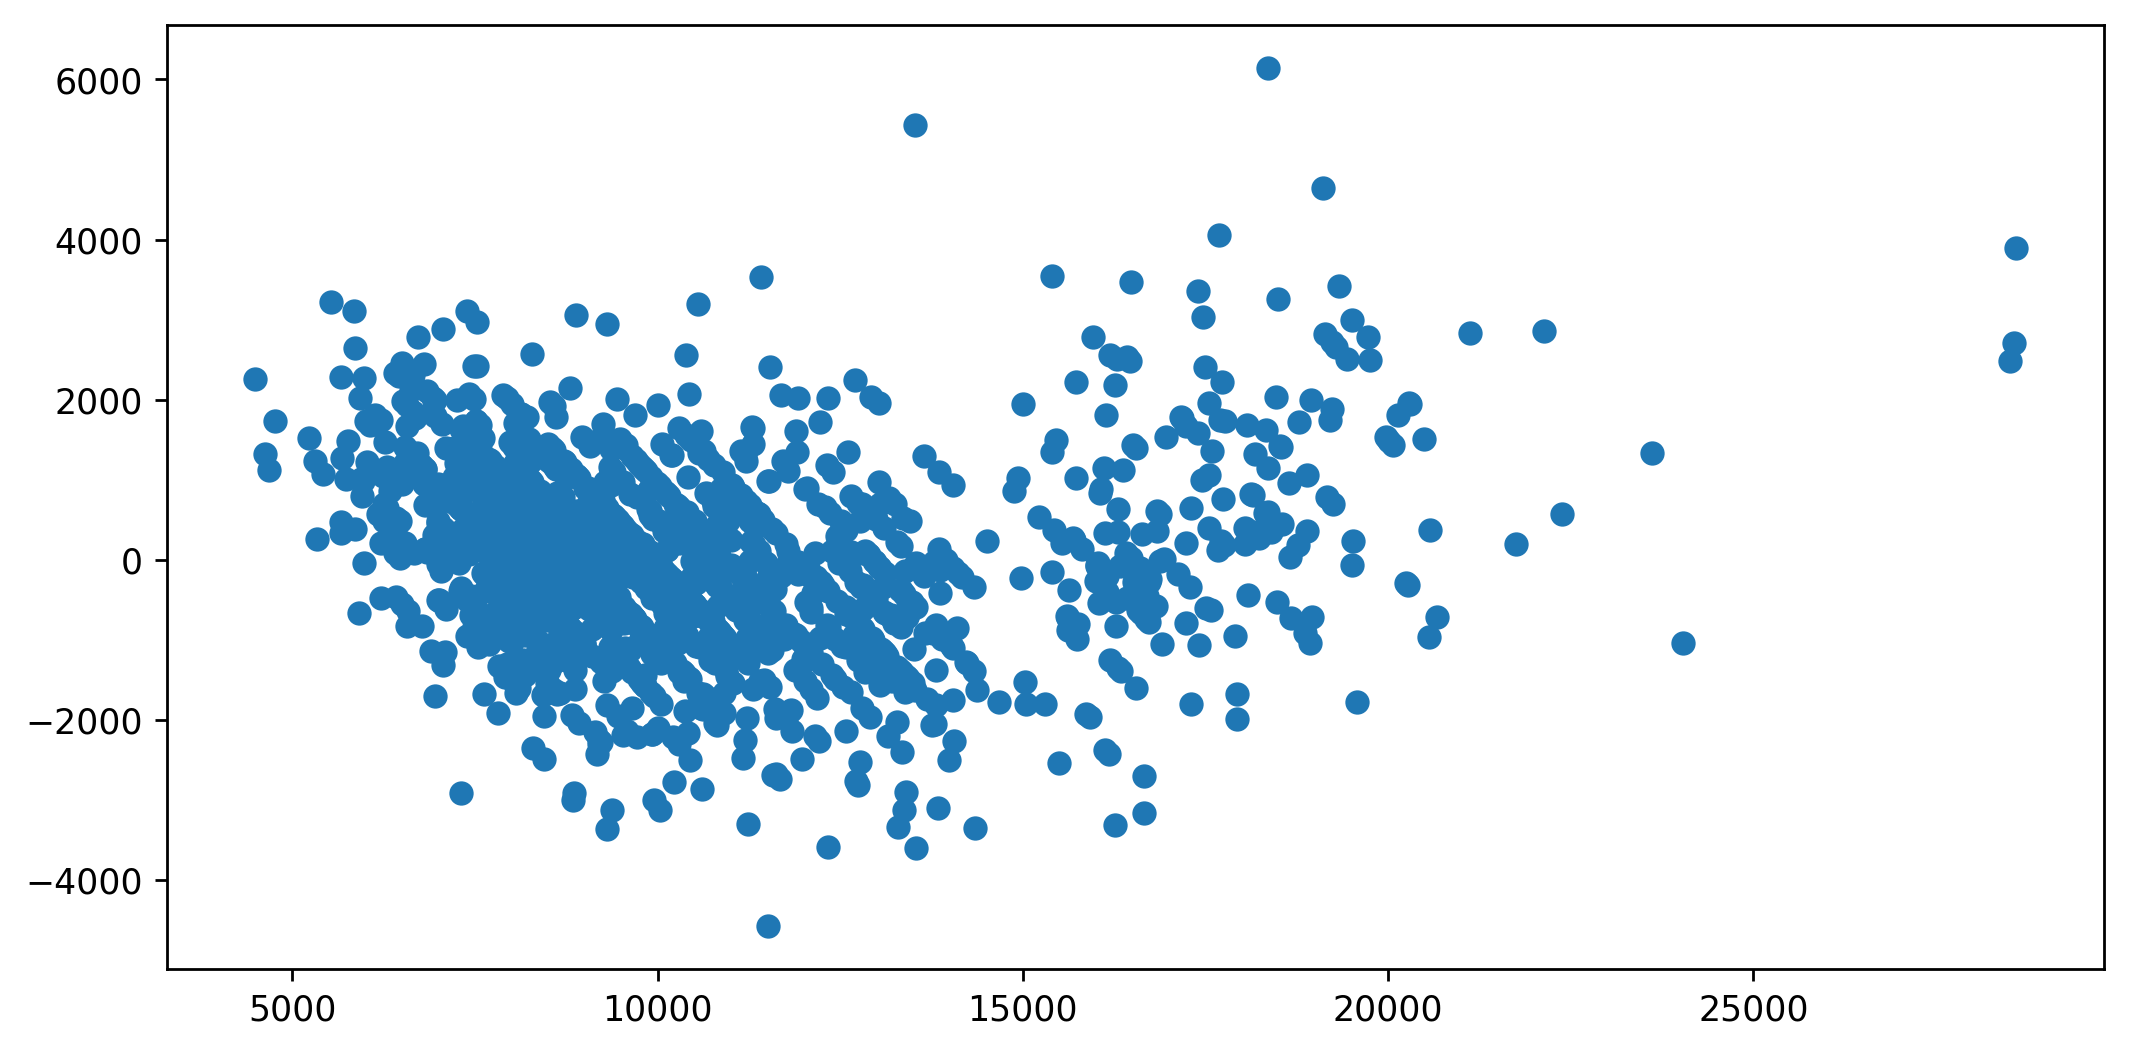

In [54]:
plt.scatter(final.fittedvalues, final.resid);

In [ ]:
final.predict